## Insurance Claims- Fraud Detection Problem:

Business case: Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made.

In [1]:
#Importing All Libraries required to build Model:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import plot_roc_curve

## Import / Reading the dataset

In [11]:
df=pd.read_csv('insurance_fraud.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [13]:
df.shape

(1000, 40)

In [14]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [15]:
df.drop(['_c39'],axis=1,inplace=True)

In [16]:
df.drop(['policy_number'],axis=1,inplace=True)

In [17]:
df.drop(['incident_location'],axis=1,inplace=True)

<AxesSubplot:>

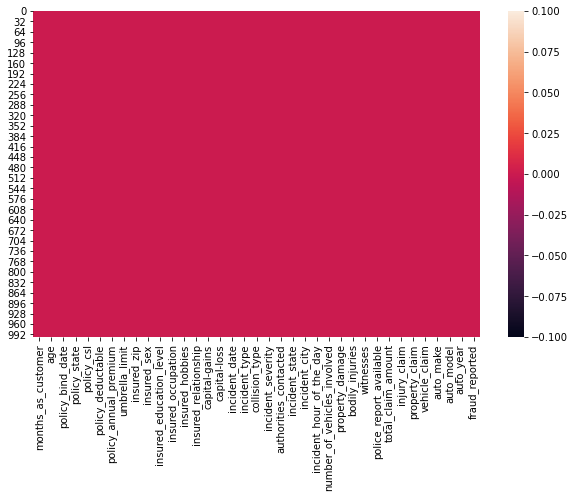

In [18]:
plt.figure(figsize=[10,6])
sns.heatmap(df.isnull())

In [19]:
df[df=="?"].any()

months_as_customer             False
age                            False
policy_bind_date               False
policy_state                   False
policy_csl                     False
policy_deductable              False
policy_annual_premium          False
umbrella_limit                 False
insured_zip                    False
insured_sex                    False
insured_education_level        False
insured_occupation             False
insured_hobbies                False
insured_relationship           False
capital-gains                  False
capital-loss                   False
incident_date                  False
incident_type                  False
collision_type                  True
incident_severity              False
authorities_contacted          False
incident_state                 False
incident_city                  False
incident_hour_of_the_day       False
number_of_vehicles_involved    False
property_damage                 True
bodily_injuries                False
w

Observation:We can notice that there are 3 columns ("collision_type","property_damage","police_report_available")with unwanted character values. Lets try to handle that first. Also we can see that the column _c39 is of no data and fully blank datas.so lets drop this column.

In [20]:
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [21]:
df['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [22]:
df['police_report_available'].value_counts()

NO     343
?      343
YES    314
Name: police_report_available, dtype: int64

In [25]:
df["collision_type"]=df["collision_type"].str.replace("?","none")

In [26]:
df["property_damage"]=df["property_damage"].str.replace("?","none")

In [27]:
df["police_report_available"]=df["police_report_available"].str.replace("?","none")

Now , we can proceed further for EDA part.

# Data Analysis / EDA

In [50]:
#Statistical Summary

df.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

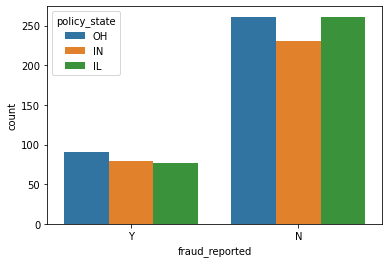

In [29]:
sns.countplot(x=df['fraud_reported'],hue=df['policy_state'],data=df)

Policy states of all kinds are of high counts with nonfradunts.

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

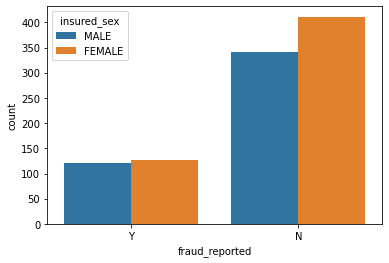

In [30]:
sns.countplot(x=df['fraud_reported'],hue=df['insured_sex'],data=df)

The counts of Male and Females seems to be higher for the Non Fraudulent(N)

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

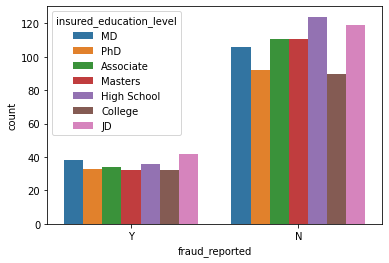

In [31]:
sns.countplot(x=df['fraud_reported'],hue=df['insured_education_level'],data=df)

Counts of High school and JD are higher with no fraud report

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

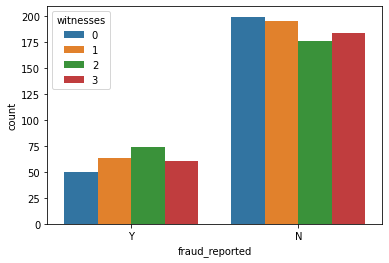

In [32]:
sns.countplot(x=df['fraud_reported'],hue='witnesses',data=df)

counts are higher with all kinds of witnesses for non fraud report.

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

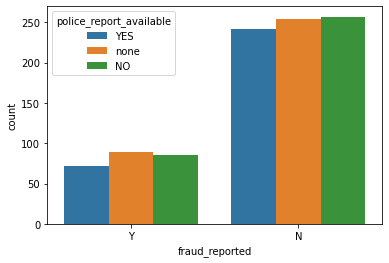

In [33]:
sns.countplot(x=df['fraud_reported'],hue='police_report_available',data=df)

there are not much Police reports available for fraud and non fraud counts

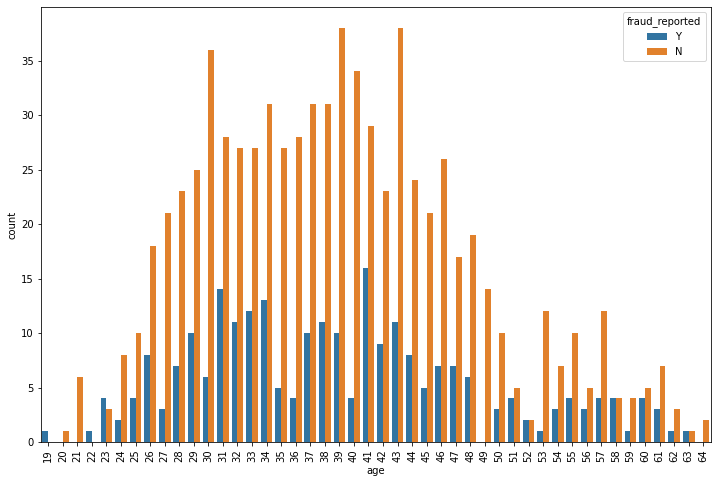

In [34]:
plt.figure(figsize=(12,8))
sns.countplot(x=df['age'],hue='fraud_reported',data=df)
plt.xticks(rotation=90)
plt.show()

many Frauds reported in the Age group of 31 to 41 ages.

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

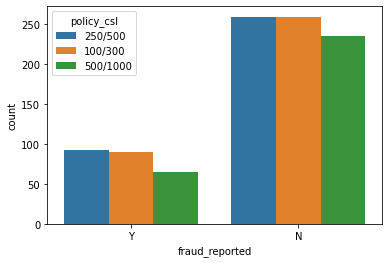

In [35]:
sns.countplot(x=df['fraud_reported'],hue=df['policy_csl'],data=df)

count of Combined Single Limit Policy is low with the Fraud report yes.

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

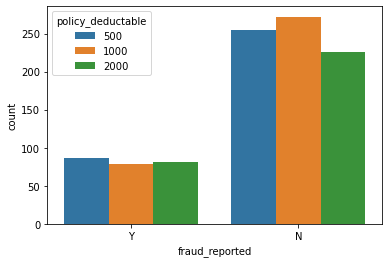

In [36]:
sns.countplot(x=df['fraud_reported'],hue=df['policy_deductable'],data=df)

The count of policy deductables is higher when compared with the fraud reported counts.

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

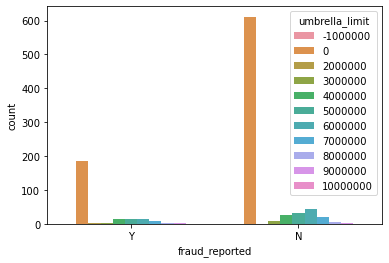

In [38]:
sns.countplot(x=df['fraud_reported'],hue=df['umbrella_limit'],data=df)

count of Zero Umbrella limit seems to be high with both counts of fraud and non fraud report.

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

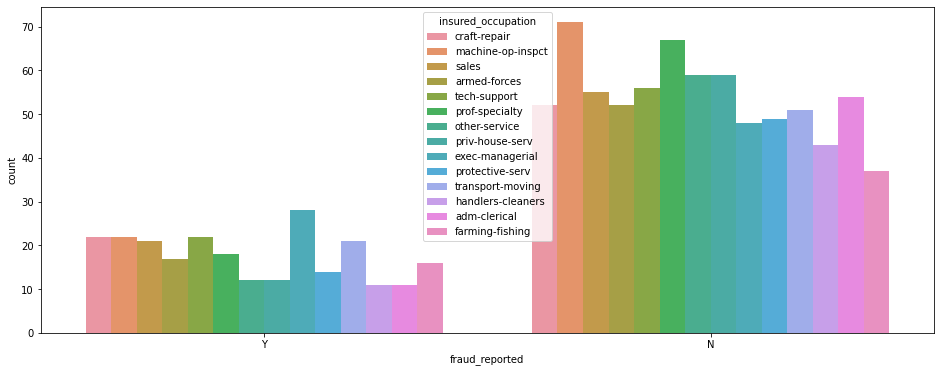

In [39]:
plt.figure(figsize=[16,6])
sns.countplot(x=df['fraud_reported'],hue=df['insured_occupation'],data=df)

Exec-managerial and transport-moving occupation people has high fraud reports.

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

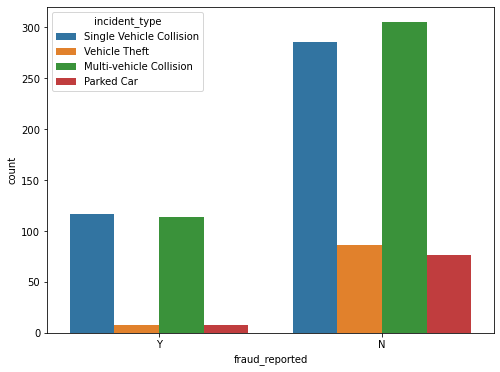

In [40]:
plt.figure(figsize=[8,6])
sns.countplot(x=df['fraud_reported'],hue=df['incident_type'],data=df)

Count of Multi-Vehicle collision seems to be very high with No fraud reports.

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

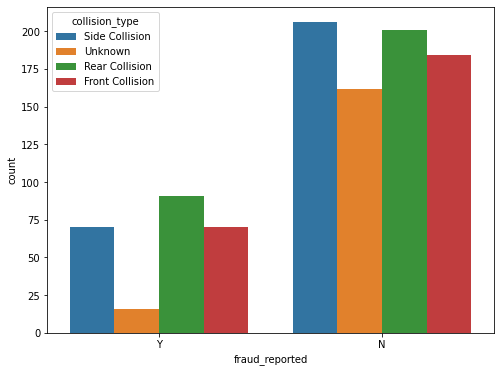

In [41]:
plt.figure(figsize=[8,6])
sns.countplot(x=df['fraud_reported'],hue=df['collision_type'],data=df)

Rear colision seems to be high without fraud reports. Also the fraud report states that rear collision is high when compared with other types of collisions.

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

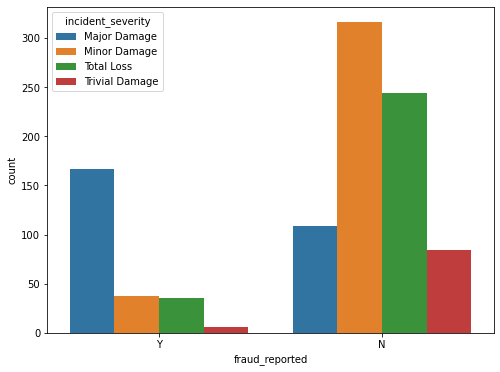

In [42]:
plt.figure(figsize=[8,6])
sns.countplot(x=df['fraud_reported'],hue=df['incident_severity'],data=df)

Major Damages seems to have high number of Fraud Reports.

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

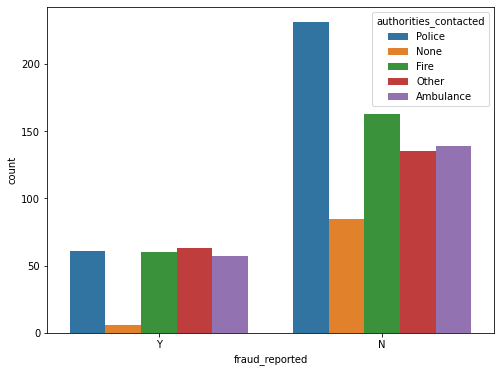

In [43]:
plt.figure(figsize=[8,6])
sns.countplot(x=df['fraud_reported'],hue=df['authorities_contacted'],data=df)

contacted persons are very low in counts with fraud reported yes ones.

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

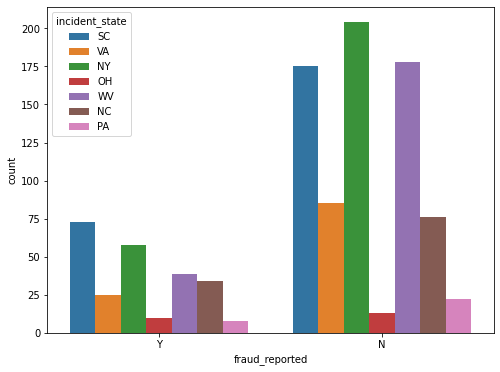

In [44]:
plt.figure(figsize=[8,6])
sns.countplot(x=df['fraud_reported'],hue=df['incident_state'],data=df)

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

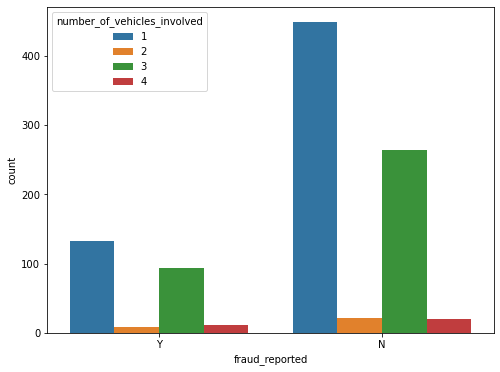

In [45]:
plt.figure(figsize=[8,6])
sns.countplot(x=df['fraud_reported'],hue=df['number_of_vehicles_involved'],data=df)

High number of vehicles involved is 4 and min is 1 vehicle. Count of one vehicle involvement is high with other numbers. Both with fraud report and without fraud report has high counts in single vehicle when compared with others.

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

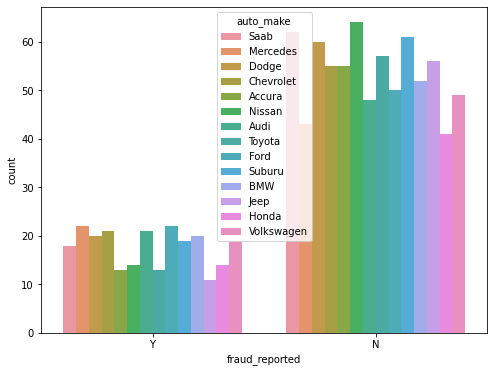

In [46]:
plt.figure(figsize=[8,6])
sns.countplot(x=df['fraud_reported'],hue=df['auto_make'],data=df)

<AxesSubplot:xlabel='auto_year', ylabel='count'>

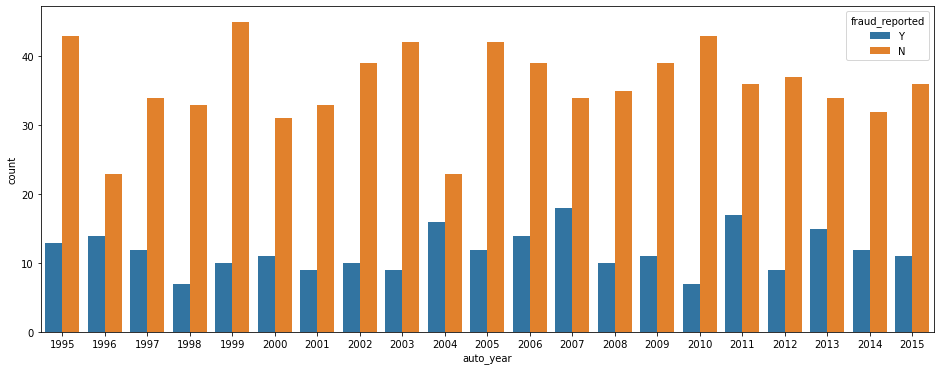

In [47]:
plt.figure(figsize=[16,6])
sns.countplot(x=df['auto_year'],hue=df['fraud_reported'],data=df)

Year 1999,1995,2010 seems to have high counts and fraud report seems to have high in 2007,2011,2013,2004

<AxesSubplot:title={'center':'Gendeg Vs Insured claim Amount'}, xlabel='insured_sex', ylabel='total_claim_amount'>

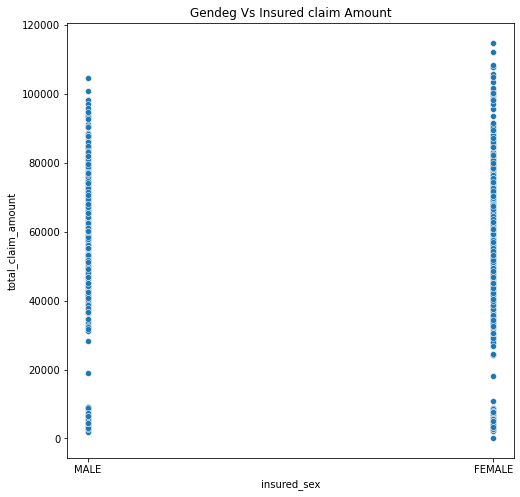

In [48]:
plt.figure(figsize=[8,8])
plt.title('Gendeg Vs Insured claim Amount')
sns.scatterplot(df['insured_sex'],df['total_claim_amount'],palette='bright')

Total claim amount seems to be high in Females count



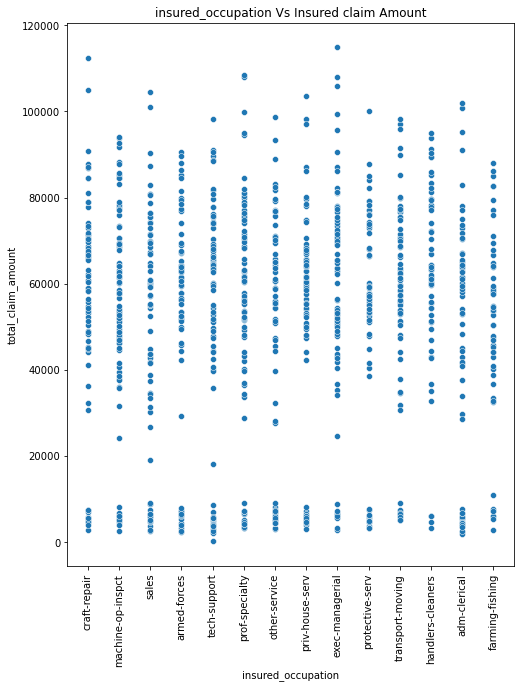

In [49]:
plt.figure(figsize=[8,10])
plt.title('insured_occupation Vs Insured claim Amount')
sns.scatterplot(df['insured_occupation'],df['total_claim_amount'],palette='bright')
plt.xticks(rotation=90)
plt.show()

Higher amount of claim is with exec-managerial and Craft-repair category of occupation.

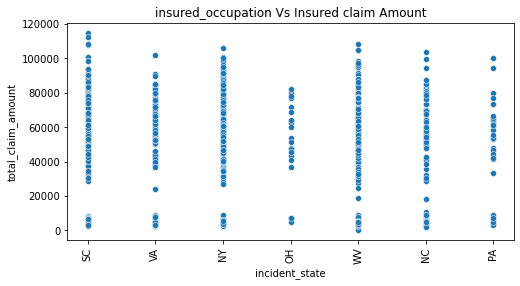

In [51]:

plt.figure(figsize=[8,4])
plt.title('insured_occupation Vs Insured claim Amount')
sns.scatterplot(df['incident_state'],df['total_claim_amount'],palette='bright')
plt.xticks(rotation=90)
plt.show()

Claim amount looks to be high in SC and WV compared to other states.

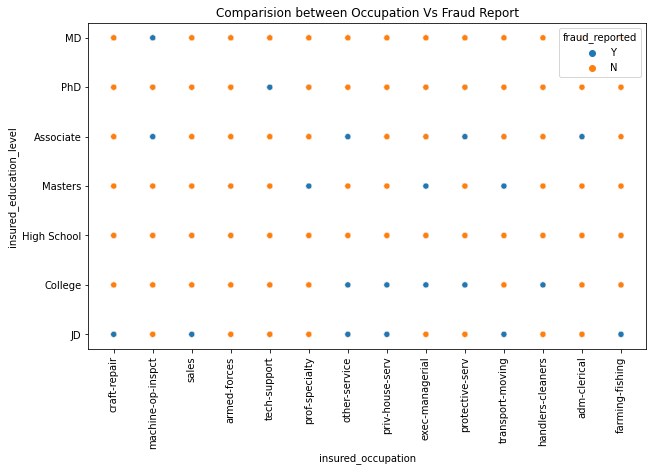

In [52]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Occupation Vs Fraud Report')
sns.scatterplot(df['insured_occupation'],df['insured_education_level'],hue=df['fraud_reported'])
plt.xticks(rotation=90)
plt.show()

More number of fraud are with College and JD catogories of education level and occupations with handlers-cleaners,other service,priv-houde-service

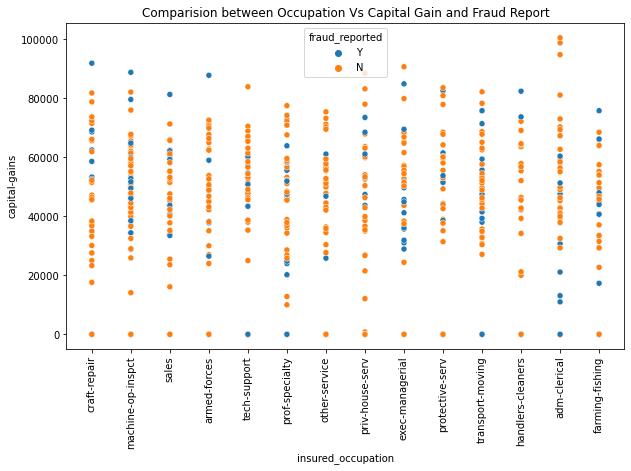

In [53]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Occupation Vs Capital Gain and Fraud Report')
sns.scatterplot(df['insured_occupation'],df['capital-gains'],hue=df['fraud_reported'])
plt.xticks(rotation=90)
plt.show()

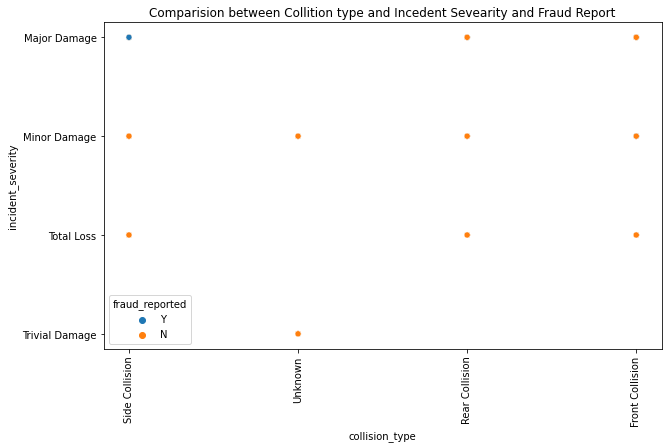

In [54]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Collition type and Incedent Sevearity and Fraud Report')
sns.scatterplot(df['collision_type'],df['incident_severity'],hue=df['fraud_reported'])
plt.xticks(rotation=90)
plt.show()

array([[<AxesSubplot:title={'center':'months_as_customer'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'policy_deductable'}>,
        <AxesSubplot:title={'center':'policy_annual_premium'}>],
       [<AxesSubplot:title={'center':'umbrella_limit'}>,
        <AxesSubplot:title={'center':'insured_zip'}>,
        <AxesSubplot:title={'center':'capital-gains'}>,
        <AxesSubplot:title={'center':'capital-loss'}>],
       [<AxesSubplot:title={'center':'incident_hour_of_the_day'}>,
        <AxesSubplot:title={'center':'number_of_vehicles_involved'}>,
        <AxesSubplot:title={'center':'bodily_injuries'}>,
        <AxesSubplot:title={'center':'witnesses'}>],
       [<AxesSubplot:title={'center':'total_claim_amount'}>,
        <AxesSubplot:title={'center':'injury_claim'}>,
        <AxesSubplot:title={'center':'property_claim'}>,
        <AxesSubplot:title={'center':'vehicle_claim'}>],
       [<AxesSubplot:title={'center':'auto_year'}>, <AxesSubplot:>,

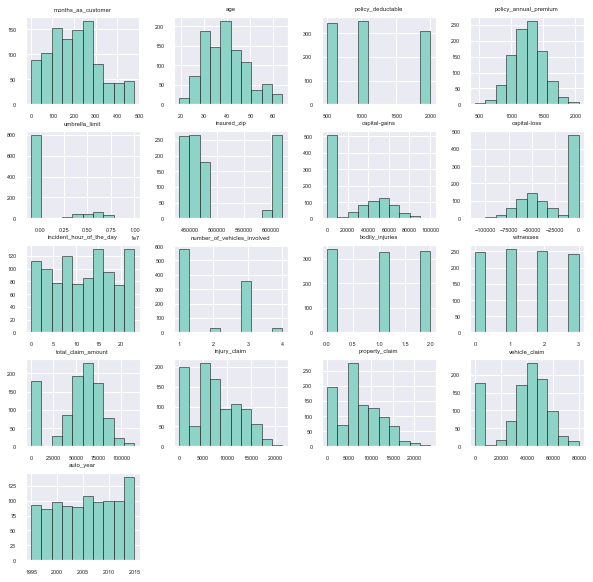

In [56]:
sns.set(style="darkgrid", palette='Set3', font_scale=0.5)
df.hist(figsize=(10,10),edgecolor='black',linewidth=0.5)

Skewness is present in the dataset.

In [58]:
df.drop(['policy_bind_date'],axis=1,inplace=True)
df.drop(['incident_date'],axis=1,inplace=True)

In [61]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['policy_state']=le.fit_transform(df['policy_state'])
df['policy_csl']=le.fit_transform(df['policy_csl'])
df['insured_sex']=le.fit_transform(df['insured_sex'])
df['insured_education_level']=le.fit_transform(df['insured_education_level'])
df['insured_occupation']=le.fit_transform(df['insured_occupation'])
df['insured_hobbies']=le.fit_transform(df['insured_hobbies'])
df['insured_relationship']=le.fit_transform(df['insured_relationship'])
df['incident_type']=le.fit_transform(df['incident_type'])
df['collision_type']=le.fit_transform(df['collision_type'])
df['incident_severity']=le.fit_transform(df['incident_severity'])
df['authorities_contacted']=le.fit_transform(df['authorities_contacted'])
df['incident_state']=le.fit_transform(df['incident_state'])
df['incident_city']=le.fit_transform(df['incident_city'])
df['property_damage']=le.fit_transform(df['property_damage'])
df['police_report_available']=le.fit_transform(df['police_report_available'])
df['auto_make']=le.fit_transform(df['auto_make'])
df['auto_model']=le.fit_transform(df['auto_model'])
df['fraud_reported']=le.fit_transform(df['fraud_reported'])

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   int32  
 3   policy_csl                   1000 non-null   int32  
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   insured_zip                  1000 non-null   int64  
 8   insured_sex                  1000 non-null   int32  
 9   insured_education_level      1000 non-null   int32  
 10  insured_occupation           1000 non-null   int32  
 11  insured_hobbies              1000 non-null   int32  
 12  insured_relationship         1000 non-null   int32  
 13  capital-gains      

In [69]:
#Correlation 

df_corr=df.corr()
df_corr

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
months_as_customer,1.000000,0.922098,-0.000328,-0.026819,0.026807,0.005018,0.004863,0.018498,0.060925,-0.000833,...,0.058383,-0.071746,0.062108,0.065329,0.034940,0.061013,0.047655,0.004202,-0.000292,0.020544
age,0.922098,1.000000,-0.014533,-0.015185,0.029188,0.014404,0.000464,0.025316,0.073337,0.000969,...,0.052359,-0.063040,0.069863,0.075522,0.060898,0.062588,0.030410,0.017343,0.001354,0.012143
policy_state,-0.000328,-0.014533,1.000000,0.001027,0.010033,0.012455,-0.017753,0.009510,-0.020481,-0.034327,...,0.022960,-0.024713,-0.006002,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.002114,0.029432
policy_csl,-0.026819,-0.015185,0.001027,1.000000,0.003384,0.023978,0.014882,0.006773,-0.010757,0.009153,...,0.071500,-0.007507,-0.055758,-0.078818,-0.042216,-0.046791,-0.004701,0.047885,-0.033082,-0.037190
policy_deductable,0.026807,0.029188,0.010033,0.003384,1.000000,-0.003245,-0.000927,0.003487,-0.009733,0.015217,...,0.066639,0.004936,0.022839,0.039107,0.064792,0.005269,-0.035379,-0.003268,0.026105,0.014817
policy_annual_premium,0.005018,0.014404,0.012455,0.023978,-0.003245,1.000000,-0.001075,0.032429,0.038853,-0.019715,...,0.002332,0.010332,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.031849,-0.049226,-0.014480
umbrella_limit,0.004863,0.000464,-0.017753,0.014882,-0.000927,-0.001075,1.000000,0.006503,0.015186,-0.018075,...,-0.010965,0.019854,-0.035362,-0.042276,-0.016538,-0.034275,0.007541,0.028914,0.006063,0.059523
insured_zip,0.018498,0.025316,0.009510,0.006773,0.003487,0.032429,0.006503,1.000000,-0.037524,0.015869,...,0.020664,0.052008,-0.033888,-0.017428,-0.007051,-0.041068,-0.021479,0.023524,-0.032903,0.022039
insured_sex,0.060925,0.073337,-0.020481,-0.010757,-0.009733,0.038853,0.015186,-0.037524,1.000000,0.009002,...,0.042463,-0.029056,-0.023727,0.000924,-0.014868,-0.029609,0.026457,-0.018421,-0.028247,0.030873
insured_education_level,-0.000833,0.000969,-0.034327,0.009153,0.015217,-0.019715,-0.018075,0.015869,0.009002,1.000000,...,0.019211,0.016119,0.074226,0.081880,0.055794,0.068348,0.055202,0.049445,0.043509,0.008808


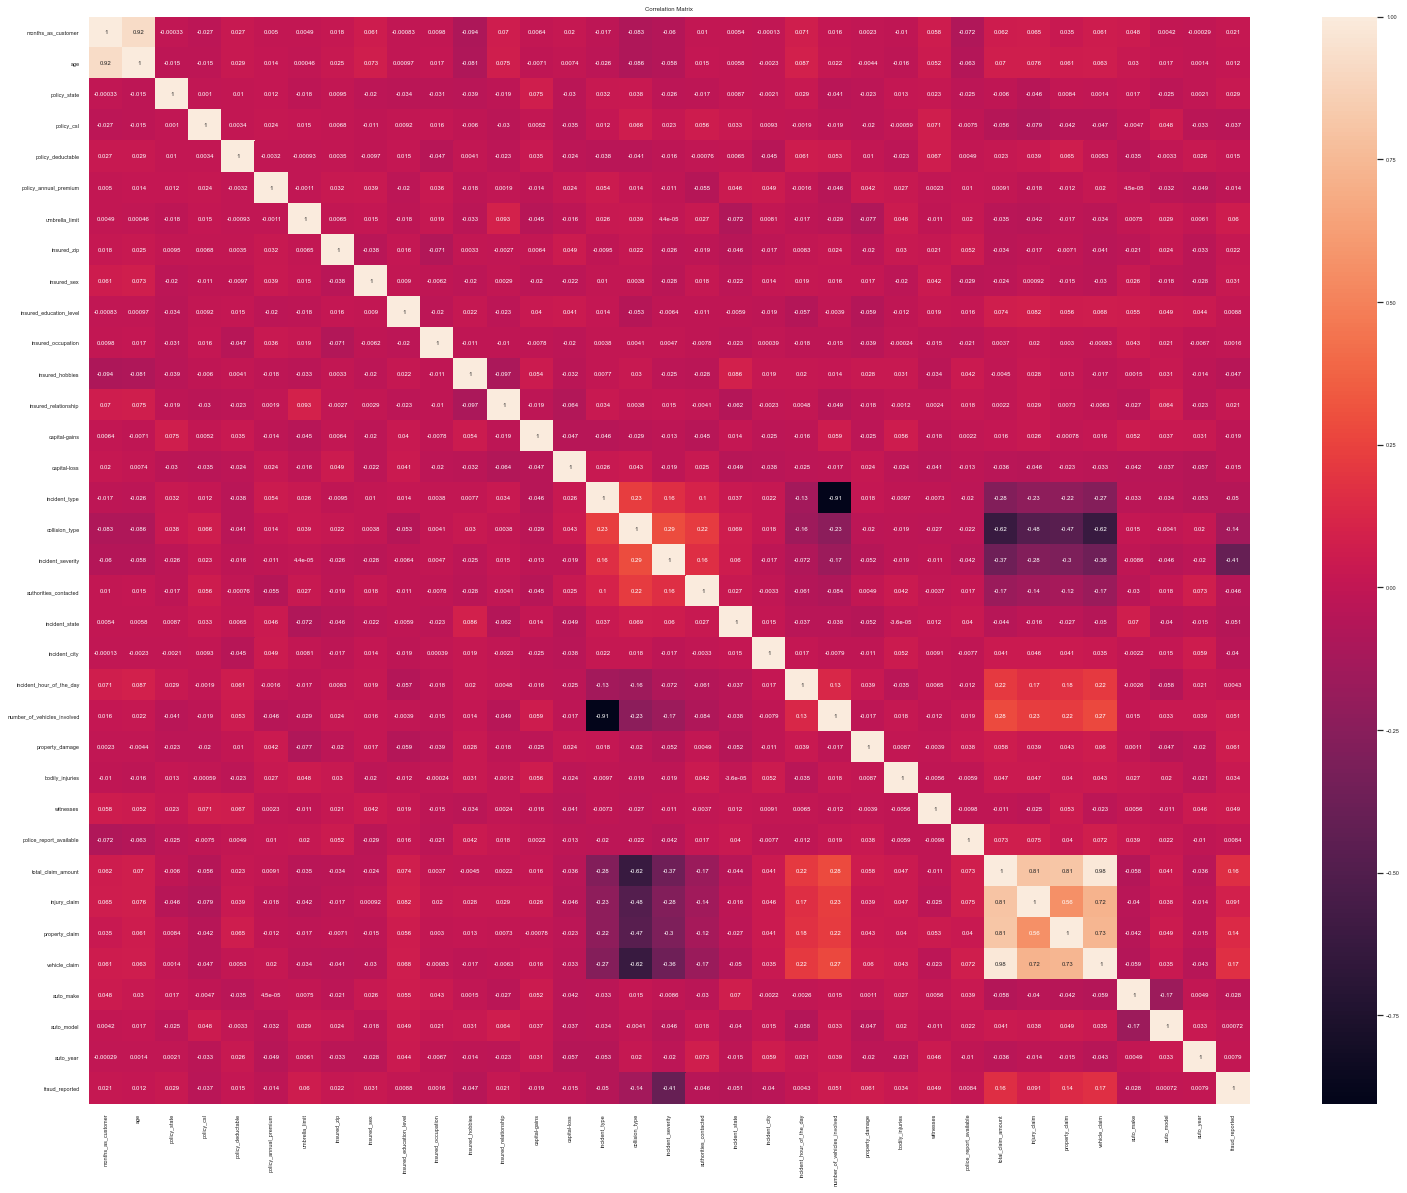

In [70]:
plt.figure(figsize=[26,20])
sns.heatmap(df_corr,annot=True)
plt.title("Correlation Matrix")
plt.show()

### Skewness

In [66]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                 0.126539
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage                0.064799
bodily_injuries                0.014777


In [67]:
#with log tranform method

for cols in df.columns:
    if df.skew().loc[cols] > 0.5:
        df[cols] = np.log1p(df[cols])

In [68]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.494499
insured_zip                    0.782405
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                 0.126539
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.421516
property_damage                0.064799
bodily_injuries                0.014777


## Outliers

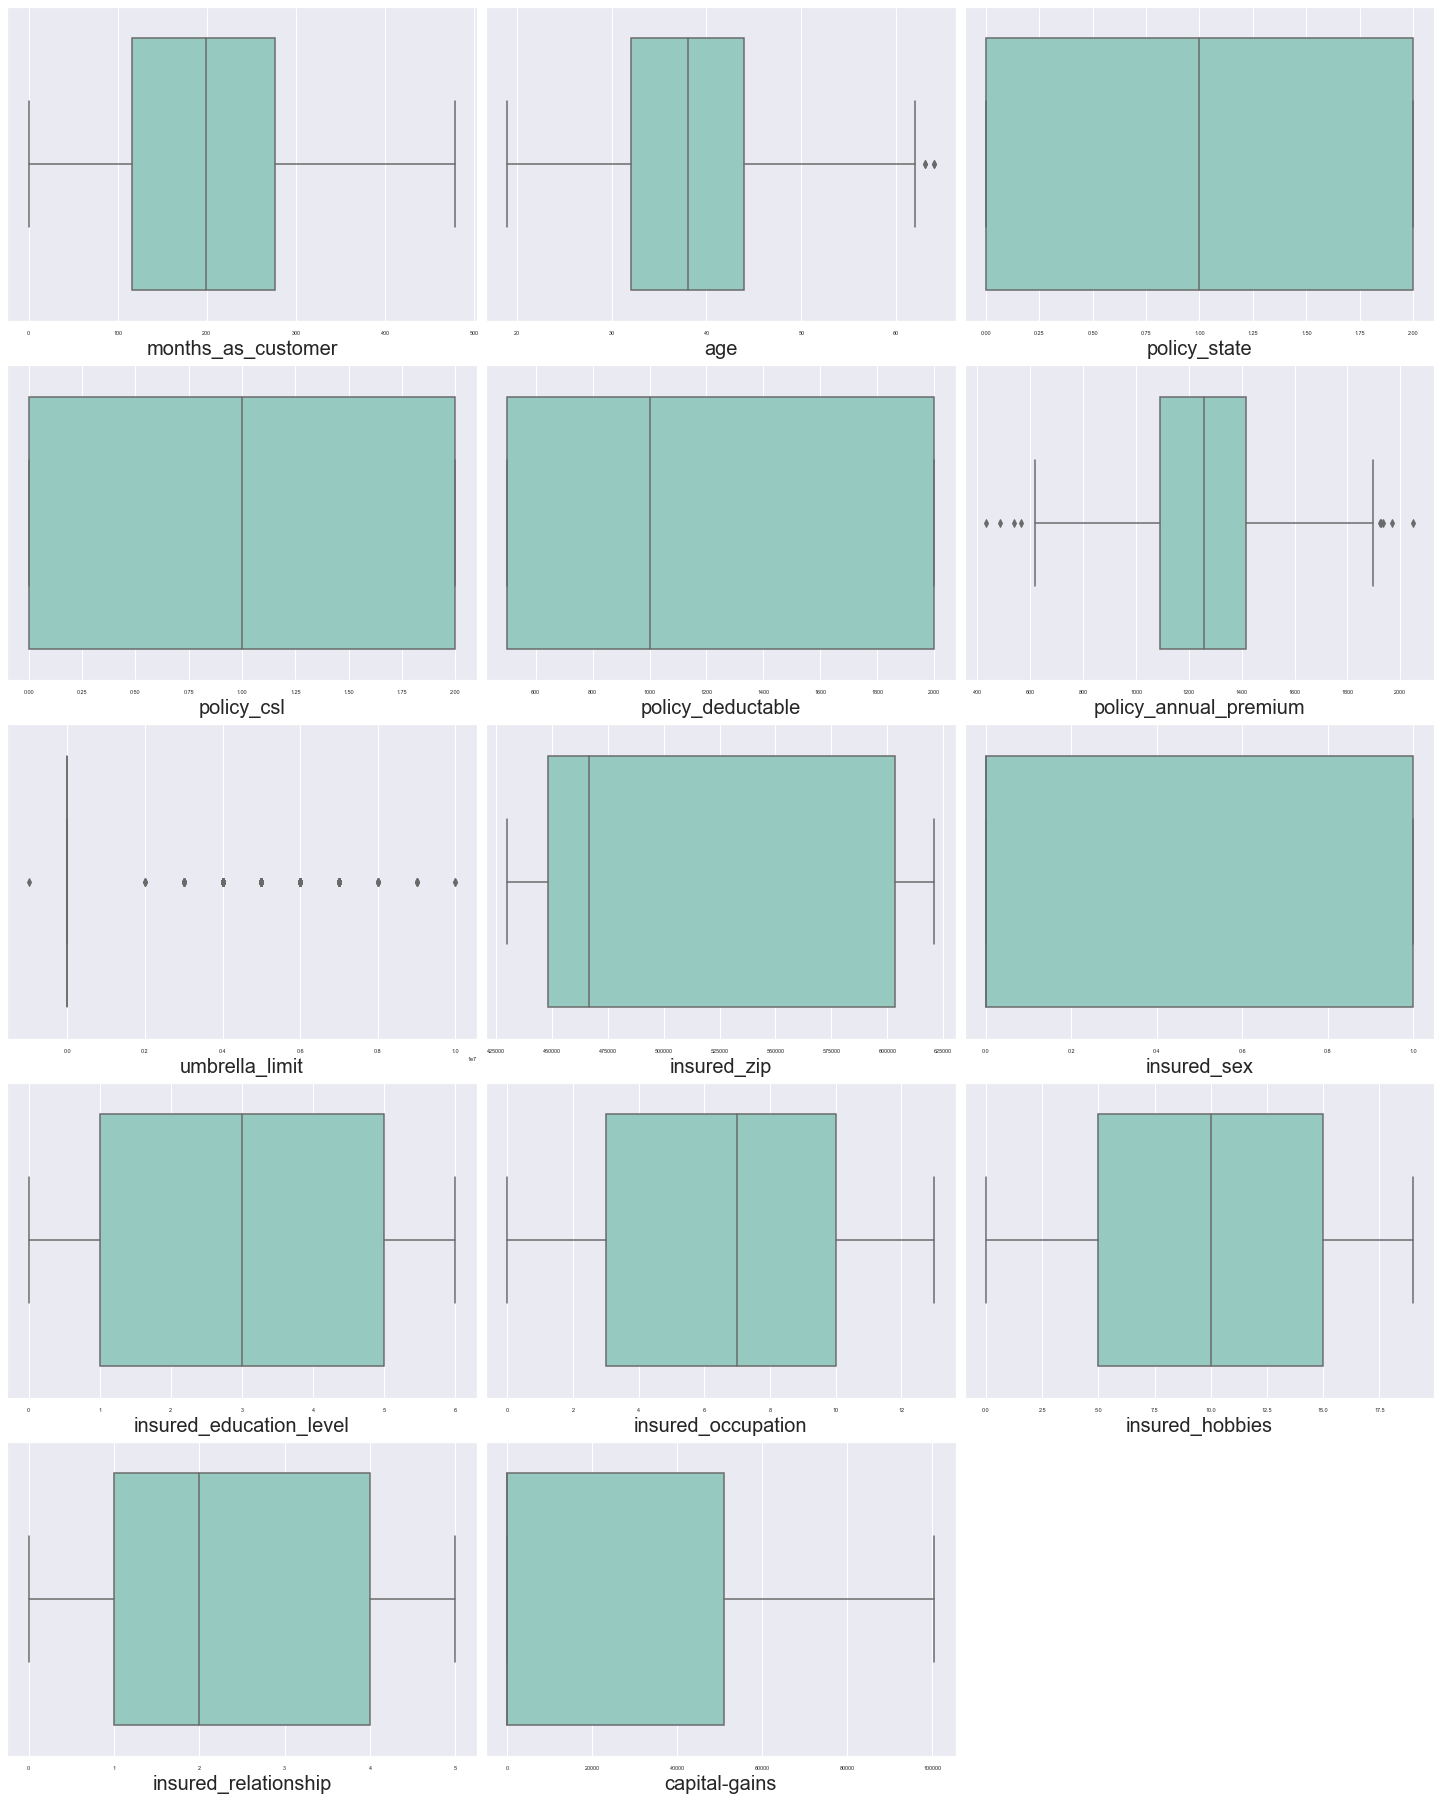

In [74]:
#lets check for outliers using box plot
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=14:
        ax=plt.subplot(5,3,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [79]:
from scipy.stats import zscore
zscore = abs(zscore(df))
df_new = df.loc[(zscore<3).all(axis = 1)]
print(df.shape)
print("After removing outliers",df_new.shape)

(980, 35)
After removing outliers (979, 35)


## Scaling and Splitting the data

In [80]:
x=df.drop(['fraud_reported'],axis=1)
x.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,328,48,2,1,1000,1406.91,0,466132,1,4,...,1,2,2,71610,6510,13020,52080,10,1,2004
1,228,42,1,1,2000,1197.22,5000000,468176,1,4,...,0,0,0,5070,780,780,3510,8,12,2007
2,134,29,2,0,2000,1413.14,5000000,430632,0,6,...,2,3,1,34650,7700,3850,23100,4,30,2007
3,256,41,0,1,2000,1415.74,6000000,608117,0,6,...,1,2,1,63400,6340,6340,50720,3,34,2014
4,228,44,0,2,1000,1583.91,6000000,610706,1,0,...,0,1,1,6500,1300,650,4550,0,31,2009


In [81]:
y=df['fraud_reported']
y.head()

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int32

In [82]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

## SMOTE

In [83]:
y.value_counts()

0    740
1    240
Name: fraud_reported, dtype: int64

In [84]:
#lets use oversampling technique on minority class using smote method
#import smote from imblearn
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x_over,y_over=sm.fit_resample(x,y)
y_over.value_counts()

0    740
1    740
Name: fraud_reported, dtype: int64

In [87]:
#Splitting into train and test dataset

from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.30,random_state=56)

In [88]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1036, 34), (444, 34), (1036,), (444,))

In [89]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

In [90]:
KNN=KNeighborsClassifier()
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=60)
GNB=GaussianNB()
RFC=RandomForestClassifier(n_estimators=200,random_state=60)
GBC=GradientBoostingClassifier(n_estimators=200,random_state=60)
ABC=AdaBoostClassifier(random_state=60)
ETC=ExtraTreesClassifier(random_state=60)

In [91]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
models.append(('GaussianNB', GNB))
models.append(('RandomForestClassifier', RFC))
models.append(('GradientBoostingClassifier', GBC))
models.append(('ExtraTreesClassifier',ETC))
models.append(('AdaBoostClassifier',ABC))

*********************** KNeighborsClassifier ***********************


KNeighborsClassifier()


Accuracy_score =  0.6599099099099099


Cross_Val_Score =  0.6885135135135136


roc_auc_score =  0.6783735332464146


classification_report
               precision    recall  f1-score   support

           0       0.94      0.39      0.55       236
           1       0.58      0.97      0.73       208

    accuracy                           0.66       444
   macro avg       0.76      0.68      0.64       444
weighted avg       0.77      0.66      0.63       444



[[ 91 145]
 [  6 202]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*********************** SVC ***********************


SVC()


Accuracy_score =  0.8378378378378378


Cross_Val_Score =  0.8695945945945948


roc_auc_score =  0.8403275749674055


classification_report
               precision    recall  f1-score   support

           0       0.88      0.80      0.84       236
           1       0.80      0.88      0.84       208

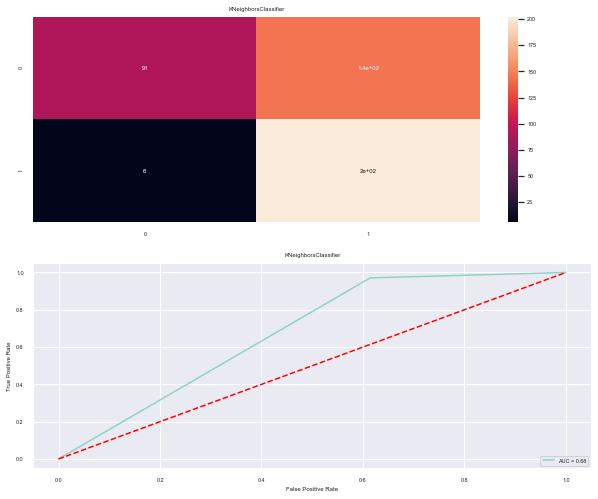

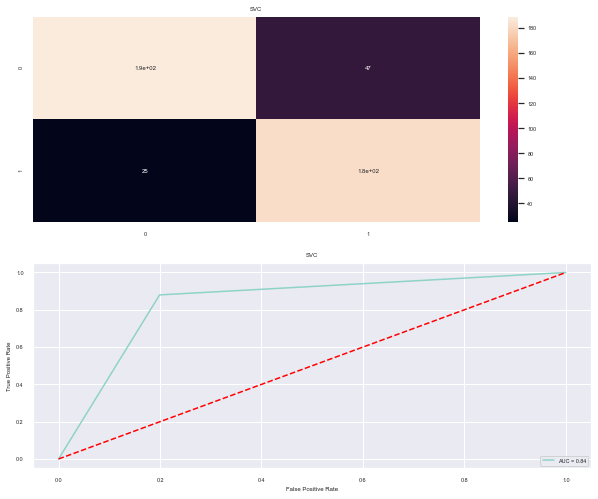

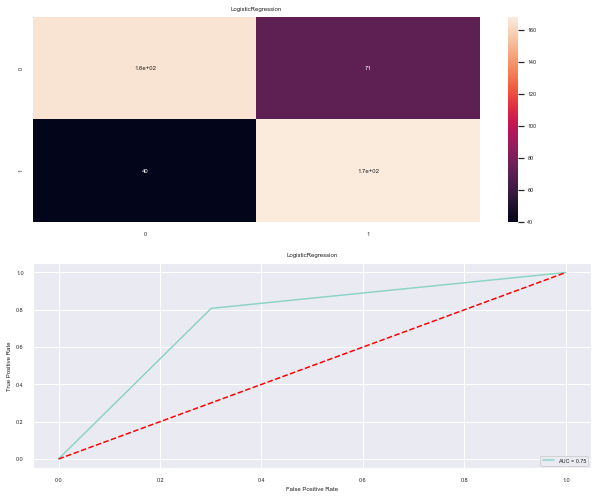

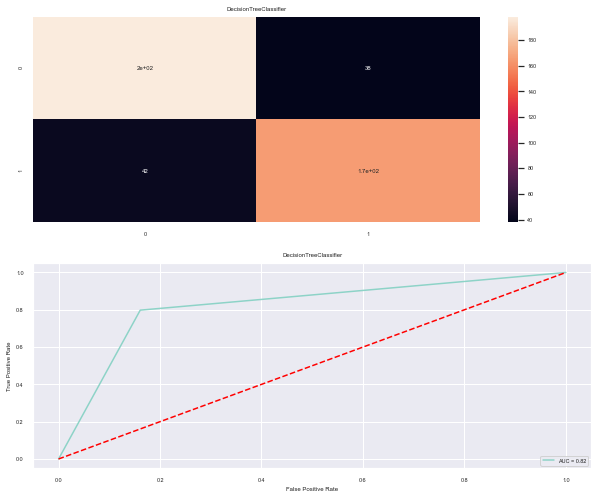

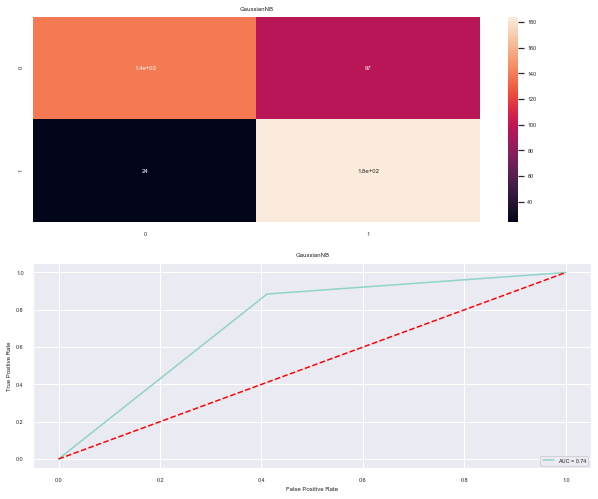

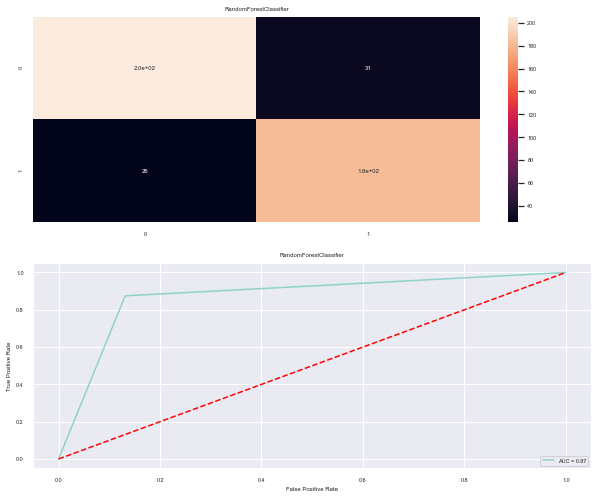

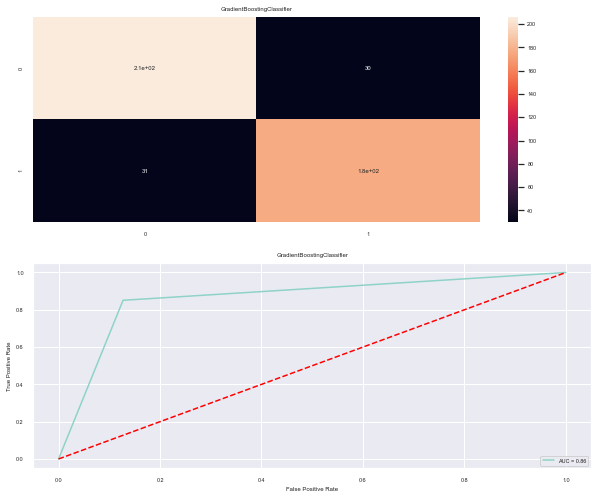

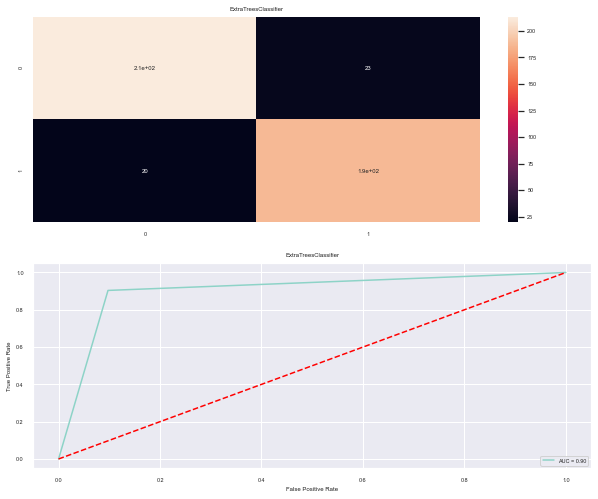

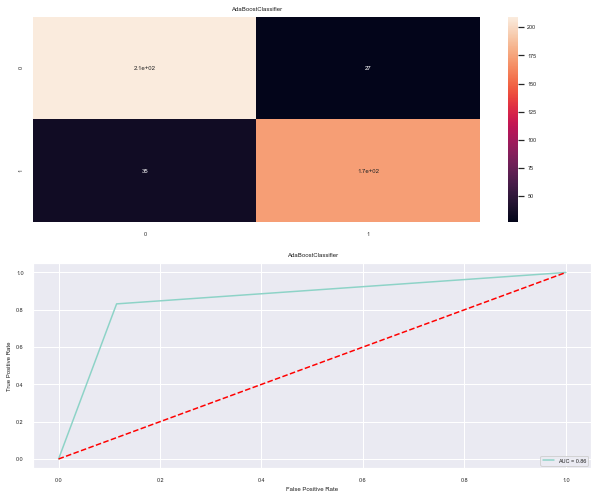

In [92]:
Model = []
score = []
cvs=[]
rocscore=[]
for name,model in models:
    print('***********************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, x_over, y_over, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [93]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score ,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,65.990991,68.851351,67.837353
1,SVC,83.783784,86.959459,84.032757
2,LogisticRegression,75.000000,73.243243,75.342243
3,DecisionTreeClassifier,81.981982,83.986486,81.852999
4,GaussianNB,72.747748,71.081081,73.679922
5,RandomForestClassifier,87.162162,88.378378,87.182203
6,GradientBoostingClassifier,86.261261,88.851351,86.192145
7,ExtraTreesClassifier,90.315315,91.824324,90.319426
8,AdaBoostClassifier,86.036036,85.608108,85.866199


## HyperParameter tuning

In [94]:
#parameters={'max_depth': np.arange(2,10),'criterion': ['gini','entropy']}
parameters ={
              "bootstrap": [True,False],
              "criterion" : ["gini", "entropy"],              
             }

In [95]:
gcv=GridSearchCV(RandomForestClassifier(), parameters,cv=5) #Tuning RandomForestClassifier

In [96]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy']})

In [97]:
gcv.best_params_

{'bootstrap': False, 'criterion': 'gini'}

In [98]:
mod=RandomForestClassifier(bootstrap='False',criterion='gini')
mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(f1_score(y_test,pred,average="macro")*100)

86.66238983335623


In [99]:
#parameters={'max_depth': np.arange(2,10),'criterion': ['gini','entropy']}
params={"n_estimators":[20,40,80],"max_features":["auto", "log2"],"min_samples_split":[2,4,8],"bootstrap":[True, False],'max_depth':[5,10,15],'min_samples_leaf':np.arange(2,10)}

In [100]:
grid = GridSearchCV(ETC,param_grid=params,cv=5,n_jobs=-1)

In [101]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(random_state=60), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [5, 10, 15],
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [20, 40, 80]})

In [102]:
grid.best_params_

{'bootstrap': False,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 80}

In [104]:
Etc=ExtraTreesClassifier(bootstrap=False,max_depth=10,max_features='auto',min_samples_leaf=2,min_samples_split=2,n_estimators=80)
Etc.fit(x_train,y_train)
Etc.fit(x_train,y_train)
Etc_pred = ETC.predict(x_test)
print('Accuracy score' ,accuracy_score(Etc_pred,y_test))
Etc_cv=cross_val_score(Etc,x,y,cv=5)
print('CV_Score', Etc_cv.mean())

Accuracy score 0.8851351351351351
CV_Score 0.7459183673469386


### ETC is best model performing with 90% accuracy before the hypperparameter tuning , so we,ll go with the ETC extratreesClassifier model .

## Saving the model

In [106]:
import joblib
joblib.dump(ETC,"insurance_fraud.csv")

['insurance_fraud.csv']

In [107]:
model=joblib.load("insurance_fraud.csv")

In [108]:
pred_= model.predict(x_test)
print("Prediction", pred_)
print("Actual", y_test)

Prediction [1 1 1 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1 1
 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1
 1 1 0 1 0 0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0
 1 0 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 1 1 0 0 0 1 1
 0 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0
 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0
 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1
 0 1 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 1 0 0 1 1 1 1 0 0
 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 0 0 1 1 0 1 1 0 1 0 1 1 1
 1 0 1 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 1
 1 1 0 0 1 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1
 1 0 1 1 1 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1]
Actual 1246    1
419     1
235     1
1225    1
867     0
       ..
719     0
292     0
4

In [109]:
print('error:')

print('mean absolute error:', mean_absolute_error(y_test,pred_))
print('mean squared error:', mean_squared_error(y_test,pred_))

error:
mean absolute error: 0.11486486486486487
mean squared error: 0.11486486486486487
